## 1.0 Intro

### The general objective of this project is to analyze a database of tweets by politicians to verify if there is ideology in the tweets.

## 2.0 Imports

In [1]:
# Basics
import pandas as pd
import numpy as np

# JSON
import json

# Data Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expressions
import re

# Natural Language Processing
import emoji
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.collocations import *

# Import counter class from collections module
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tulio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tulio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3.0 Data Manipulation

### 3.1 Data Entry

In [2]:
# Open JSON
  
bolso_tweets = pd.read_json(r'./datasets/jairbolsonaro.json')

lula_tweets = pd.read_json(r'./datasets/LulaOficial.json')

In [3]:
bolso_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2019-07-19 02:04:16+00:00,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",0.0,NaN,NaN,NaN,NaN
3,2018-10-09 02:52:56+00:00,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",0.0,NaN,NaN,NaN,NaN
4,2017-08-23 15:12:48+00:00,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,2019-09-17 16:39:08+00:00,1173999841724325889,1173999841724325888,Menos burocratização e gastos ao brasileiro: a...,False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,46305,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
6790,2016-02-20 12:32:40+00:00,701021650167406592,701021650167406592,A @RevistaEpoca mente DESCARADAMENTE a meu res...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,893,False,False,pt,"{'media': [{'id': 701021612578103297, 'id_str'...",0.0,NaN,NaN,NaN,NaN
6791,2019-01-07 15:22:55+00:00,1082296529434697728,1082296529434697728,Foi realizada hoje a Cerimônia de Posse dos Pr...,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,42443,False,False,pt,"{'media': [{'id': 1082296523990491137, 'id_str...",0.0,NaN,NaN,NaN,NaN
6792,2019-10-16 11:27:36+00:00,1184430688608673793,1184430688608673792,- O Estatuto do Desarmamento ainda está em vig...,False,"[0, 227]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34029,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
lula_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-16 01:53:02+00:00,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-08 23:23:49+00:00,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-18 11:24:23+00:00,920611514071076865,920611514071076864,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-24 22:24:18+00:00,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14956,2014-10-23 13:51:38+00:00,525283408856219648,525283408856219648,O prefeito Eduardo Paes e @LindbergFarias acom...,False,"[0, 99]","{'hashtags': [{'text': 'QueroDilmaTreze', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,8,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
14957,2018-10-02 13:23:07+00:00,1047114757654884352,1047114757654884352,"Haddad, o candidato de Lula, com Lindberg sena...",False,"[0, 140]","{'hashtags': [{'text': 'HaddadP', 'indices': [...","<a href=""https://periscope.tv"" rel=""nofollow"">...",NaN,NaN,...,191,False,False,pt,NaN,0.0,NaN,NaN,NaN,NaN
14958,2016-07-24 15:04:25+00:00,757229960314617856,757229960314617856,"Nádia Campeão: ""não vamos permitir que essa ca...",False,"[0, 123]","{'hashtags': [{'text': 'SPcomHaddad', 'indices...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,12,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
14959,2019-06-11 15:31:21+00:00,1138468770232569860,1138468770232569856,"Os advogados de Lula, Cristiano Zanin e José R...",False,"[0, 232]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1191,False,False,pt,NaN,0.0,NaN,NaN,NaN,NaN


### 3.2 Data Cleaning

In [5]:
# Create a new dataframe with the following columns: 'created_at' 'full_text'

bolso = bolso_tweets[['created_at','full_text']].copy()

lula = lula_tweets[['created_at','full_text']].copy()

# Rename selected columns

bolso = bolso.rename(columns={'created_at': 'data','full_text': 'texto'})

lula = lula.rename(columns={'created_at': 'data','full_text': 'texto'})

# Sort dataframe by date in ascending order

bolso.sort_values(by=['data'], inplace=True)

lula.sort_values(by=['data'], inplace=True)

In [6]:
bolso

,data,texto
3659,2010-04-01 01:33:17+00:00,Boa noite a todos @depchicolanecar @reportercrime
2950,2010-04-01 01:35:34+00:00,"Me desculpem, boa noite @depchicoalencar @repo..."
5022,2010-04-01 01:43:59+00:00,Os militares assumiram o governo em março de 6...
81,2010-04-01 01:46:16+00:00,"Em 64, o povo ñ suportava + greves, desordem s..."
156,2010-04-01 02:02:37+00:00,#debate64 O Governo se fez enérgico. Os q pega...
...,...,...
2920,2020-01-08 15:27:39+00:00,- A lei 1.079 de 1950 trata dos crimes de resp...
1444,2020-01-08 15:27:40+00:00,"- Não foi a Lei Orçamentária que criou o ""Fund..."
4397,2020-01-08 15:27:40+00:00,"- Do exposto, o veto aos R$ 2 bilhões, daria m..."
5971,2020-01-08 20:24:41+00:00,- Donald Trump e o Irã:\n\n- Nossa Constituiçã...


In [7]:
lula

,data,texto
3060,2014-09-02 15:09:51+00:00,Lula acaba de chegar ao @smabc de onde começar...
5735,2014-09-02 15:16:01+00:00,Acompanhe notícias da caminhada também pelo @p...
5737,2014-09-02 15:42:19+00:00,Lula visita o @smabc e cumprimenta sindicalist...
12559,2014-09-02 15:48:19+00:00,@dilmabr e Lula saem agora pelas ruas de São B...
5587,2014-09-02 15:56:49+00:00,"""Os trabalhadores estão com @dilmabr "", diz o..."
...,...,...
11778,2020-01-08 14:05:57+00:00,Na relação internacional sempre são dois inter...
12026,2020-01-08 14:17:23+00:00,Vamos ter que brigar muito para o Brasil recup...
284,2020-01-08 14:30:23+00:00,Agora inventaram uma palavra pra justificar o ...
2159,2020-01-08 20:39:55+00:00,"Bolsonaro, pensa no Brasil e pare de ser puxa ..."


In [8]:
# Define a function to clear the text

def clean(text):
    text = re.sub('@[A-Za-z0-9]+', '', text) # Remove @ sign
    text = re.sub(r'http?:\/\//S+', '', text) # Remove links http
    text = re.sub(r'RT[\s+]', '', text) # Remove RTs
    text = text.replace('#', '').replace('_', ' ') # Remove hashtags but keep text
    text = re.sub('[^\w\s]', '', text) # Remove ponctuation
    text = text.lower() # Convert all characters to lowercase
    text = ''.join(c for c in text if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    
    return text

bolso['texto'] = bolso['texto'].apply(clean)

lula['texto'] = lula['texto'].apply(clean)

In [9]:
# Define a loop to create a list of stopwords

arquivo = open("stopwords.txt", encoding="utf-8", mode="r")

stopwords = []
for linha in arquivo:
    palavra = linha.strip()
    stopwords.append(palavra)
    
stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'é',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'foi',
 'ao',
 'ele',
 'das',
 'tem',
 'à',
 'seu',
 'sua',
 'ou',
 'ser',
 'quando',
 'muito',
 'há',
 'nos',
 'já',
 'está',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'era',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'ter',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'estão',
 'você',
 'tinha',
 'foram',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'têm',
 'numa',
 'pelos',
 'elas',
 'havia',
 'seja',
 'qual',
 'será',
 'nós',
 'tenho',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'fosse',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo

In [10]:
# Remove "stopwords" from dataframes

bolso['texto'] = bolso['texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

lula['texto'] = lula['texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [11]:
bolso

,data,texto
3659,2010-04-01 01:33:17+00:00,boa noite todos
2950,2010-04-01 01:35:34+00:00,desculpem boa noite
5022,2010-04-01 01:43:59+00:00,militares assumiram governo março 64 d apelos ...
81,2010-04-01 01:46:16+00:00,64 povo ñ suportava greves desordem social cor...
156,2010-04-01 02:02:37+00:00,debate64 governo fez enérgico q pegaram armas ...
...,...,...
2920,2020-01-08 15:27:39+00:00,lei 1079 1950 trata crimes responsabilidade im...
1444,2020-01-08 15:27:40+00:00,lei orçamentária criou fundão sim lei 13487201...
4397,2020-01-08 15:27:40+00:00,exposto veto r 2 bilhões daria margem presiden...
5971,2020-01-08 20:24:41+00:00,donald trump irã constituição art 4 defesa paz...


In [12]:
lula

,data,texto
3060,2014-09-02 15:09:51+00:00,lula acaba chegar onde começará caminhada junt...
5735,2014-09-02 15:16:01+00:00,acompanhe notícias caminhada lulaedilmanoabc
5737,2014-09-02 15:42:19+00:00,lula visita cumprimenta sindicalistas funcioná...
12559,2014-09-02 15:48:19+00:00,lula saem agora ruas bernardo campo saudados p...
5587,2014-09-02 15:56:49+00:00,trabalhadores diz prefeito bernardo campo luiz...
...,...,...
11778,2020-01-08 14:05:57+00:00,relação internacional sempre dois interesses o...
12026,2020-01-08 14:17:23+00:00,vamos brigar brasil recuperar soberania sobera...
284,2020-01-08 14:30:23+00:00,agora inventaram palavra pra justificar fazend...
2159,2020-01-08 20:39:55+00:00,bolsonaro pensa brasil pare puxa saco eua ajud...


In [13]:
# Convert date column to datatime for better handling

bolso['data'] = pd.to_datetime(bolso.data)

lula['data'] = pd.to_datetime(lula.data)

In [14]:
# Create a new dataframe to include the columns with the month and year of the tweets

data_bolso = pd.DataFrame({'data':bolso.data,'texto':bolso['texto']})

data_lula = pd.DataFrame({'data':lula.data,'texto':lula['texto']})

In [15]:
# Extract the month and year from each tweet

data_bolso['month'] = data_bolso['data'].dt.month

data_bolso['year'] = data_bolso['data'].dt.year

data_lula['month'] = data_lula['data'].dt.month

data_lula['year'] = data_lula['data'].dt.year

# Include "month" and "year" columns in dataframe

data_bolso = pd.DataFrame({'data':bolso.data,'texto':bolso['texto'],'mês':data_bolso['month'],'ano':data_bolso['year']})

data_lula = pd.DataFrame({'data':lula.data,'texto':lula['texto'],'mês':data_lula['month'],'ano':data_lula['year']})

In [16]:
data_bolso

,data,texto,mês,ano
3659,2010-04-01 01:33:17+00:00,boa noite todos,4,2010
2950,2010-04-01 01:35:34+00:00,desculpem boa noite,4,2010
5022,2010-04-01 01:43:59+00:00,militares assumiram governo março 64 d apelos ...,4,2010
81,2010-04-01 01:46:16+00:00,64 povo ñ suportava greves desordem social cor...,4,2010
156,2010-04-01 02:02:37+00:00,debate64 governo fez enérgico q pegaram armas ...,4,2010
...,...,...,...,...
2920,2020-01-08 15:27:39+00:00,lei 1079 1950 trata crimes responsabilidade im...,1,2020
1444,2020-01-08 15:27:40+00:00,lei orçamentária criou fundão sim lei 13487201...,1,2020
4397,2020-01-08 15:27:40+00:00,exposto veto r 2 bilhões daria margem presiden...,1,2020
5971,2020-01-08 20:24:41+00:00,donald trump irã constituição art 4 defesa paz...,1,2020


In [17]:
data_lula

,data,texto,mês,ano
3060,2014-09-02 15:09:51+00:00,lula acaba chegar onde começará caminhada junt...,9,2014
5735,2014-09-02 15:16:01+00:00,acompanhe notícias caminhada lulaedilmanoabc,9,2014
5737,2014-09-02 15:42:19+00:00,lula visita cumprimenta sindicalistas funcioná...,9,2014
12559,2014-09-02 15:48:19+00:00,lula saem agora ruas bernardo campo saudados p...,9,2014
5587,2014-09-02 15:56:49+00:00,trabalhadores diz prefeito bernardo campo luiz...,9,2014
...,...,...,...,...
11778,2020-01-08 14:05:57+00:00,relação internacional sempre dois interesses o...,1,2020
12026,2020-01-08 14:17:23+00:00,vamos brigar brasil recuperar soberania sobera...,1,2020
284,2020-01-08 14:30:23+00:00,agora inventaram palavra pra justificar fazend...,1,2020
2159,2020-01-08 20:39:55+00:00,bolsonaro pensa brasil pare puxa saco eua ajud...,1,2020


## 4.0 Analysis

### 4.1 Houve alguma alteração significativa na quantidade de tweets durante, antes ou após os anos eleitorais de 2014 e 2018?

In [18]:
# Count of tweets per year

data_bolso['ano'].value_counts().sort_index()

2010      47
2011       1
2012      12
2013     193
2014     269
2015     435
2016     868
2017    1014
2018    1616
2019    2305
2020      34
Name: ano, dtype: int64

In [19]:
# Count of tweets per year

data_lula['ano'].value_counts().sort_index()

2014    1515
2015      66
2016    2074
2017    5311
2018    4710
2019    1265
2020      20
Name: ano, dtype: int64

In [20]:
# Create a series with the count of tweets by year and organize them

bolso_list = data_bolso['ano'].value_counts().sort_index()

lula_list = data_lula['ano'].value_counts().sort_index()

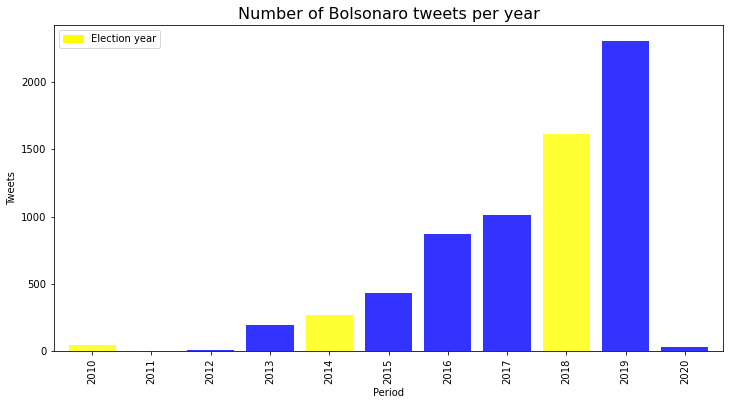

In [21]:
# Create a barplot of the number of tweets grouped per year for Bolsonaro


bolso_list.head(11).plot.bar(alpha= 0.8, width=0.8,
                       color=['yellow', 'b', 'b', 'b'],
                       figsize=(12,6))

plt.title('Number of Bolsonaro tweets per year', size=16)
plt.xlabel('Period')
plt.ylabel('Tweets')

colors = {'Election year':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

### Principais *insights* da quantidade de *tweets* do Bolsonaro

- O Bolsonaro não tinha uma interação significativa no *Twitter* antes de 2013, logo sua influência na eleição de 2010 foi mínima; <br><br>

- Percebe-se um aumento da atividade do Bolsonaro a partir do ano de 2013, o qual antecede a eleição presidencial de 2014 vencida por um candidato opositor;<br><br>

- A partir de 2014 a sua atividade cresceu consideravelmente a cada ano:<br><br>

2015 - **62%** <br>
2016 - **100%** <br>
2017 - **17%** <br>
2018 - **59%** <br>
2019 - **43%** <br>
Observação: porcentagens de crescimento em relação ao ano interior.

- Por fim, isso pode ser associado tanto a sua intenção em se candidatar a eleição de 2018 quanto a sua vitória na disputa presidencial.

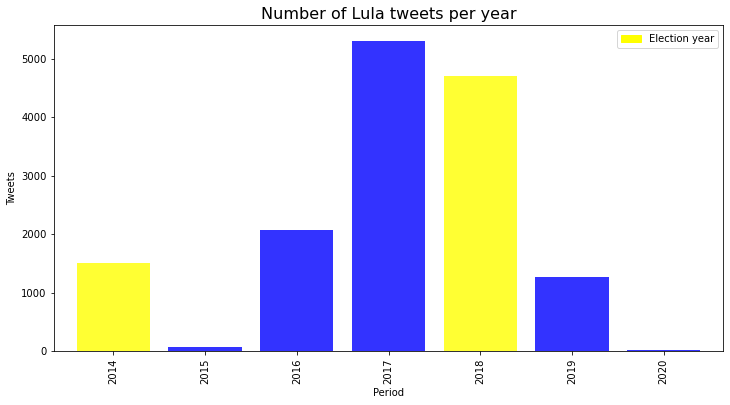

In [22]:
# Create a barplot of the number of tweets grouped per year for Lula

lula_list.head(11).plot.bar(alpha= 0.8, width=0.8,
                       color=['yellow', 'b', 'b', 'b'],
                       figsize=(12,6))

plt.title('Number of Lula tweets per year', size=16)
plt.xlabel('Period')
plt.ylabel('Tweets')

colors = {'Election year':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

### Principais *insights* da quantidade de *tweets* do Lula

- Apesar de não ter dados anteriores ao ano de 2014, é possível verificar que a atividade do Lula (1515 tweets) era bem maior do que a do Bolsonaro (269 tweets), isso pode ser devido ao fato de que a eleição foi disputada e vencida por uma partidária sua;<br><br>

- No ano de 2015 a sua atividade não foi significante;<br><br>

- Nos anos de 2016 e 2017 a sua ativdade cresceu consideralvelmente, podendo ser associado aos seus problemas com a justiça, trazendo uma maior necessidade de se expressar, bem como com a pré-eleição;<br><br>

- Por fim, no ano de 2018, sua atividade reduziu em torno de 11%, mas continuou acima dos 4.000 tweets, provavelmente por conta do ano eleitoral.

### 4.2 Quais as palavras mais escritas? É possível identificar ideologia nelas?

In [23]:
# Transforme all lines into a single line

txt1 = ' '.join(data_bolso['texto'])

txt2 = ' '.join(data_lula['texto'])

In [24]:
txt1

'boa noite todos desculpem boa noite militares assumiram governo março 64 d apelos imprensa igreja católica mulheres passeatas brasil 64 povo ñ suportava greves desordem social corrupção generalizada debate64 governo fez enérgico q pegaram armas acusavam militares violentos buscando votos indenizações milionárias debate64 fidel castro financiava luta armada idiota pode acreditar q diabo ditador queria implantar democracia brasil debate64 entreviste agora 100 pessoas c d 60 anos 99 dirão q saudades governos militares médici ovacionado maracanã debate64 esquerda treinada cuba ñ podia receber outro tratamento pcc d hj pode combatido s energia debate64 brasil 300 cuba 30 mil psol chico votou contra moção apoio liberdade presos politicos cubanos debate64 financiados fidel posam d vítimas busca d votos indenizações pndh3 censura mídia abole símblos religiosos etc debate64 brasil exportanto novelas gays ganhando bbbs psol defendendo ñ extradição criminoso battisti debate64 vivemos império vio

In [25]:
txt2

'lula acaba chegar onde começará caminhada junto lulaedilmanoabc acompanhe notícias caminhada lulaedilmanoabc lula visita cumprimenta sindicalistas funcionários lado lulaedilmanoabc lula saem agora ruas bernardo campo saudados população lulaedilmanoabc trabalhadores diz prefeito bernardo campo luiz marinho população lulaedilmanoabc 2 mil pessoas acompanham lula ruas bernardo lulaedilmanoabc geraram milhões empregos brasil diz lula lulaedilmanoabc time continuará transformando brasil finaliza lulaedilmanoabc juruna força sindical fala porque centrais vai trazer melhores condiçoes vida povo lulaedilmanoabc caminhada segue rua marechal deodoro rumo igreja matriz gritos olé olé olé olá dilma dilma lulaedilmanoabc vagner freitas presidente cut lembra muitas obras feitas sp recursos governo federal lulaedilmanoabc brasil frente dilma presidente lulaedilmanoabc dilma lá padilha aqui senado suplicy lulaedilmanoabc dilma desce homenagear comerciantes visitando instituto embelleze enquanto lula 

In [26]:
# Word tokenization

tokens1 = word_tokenize(txt1)

# The most frequent words

counts1 = Counter(tokens1)
counts_df1 = pd.DataFrame.from_dict(counts1, orient='index').reset_index()

# Column names

counts_df1.columns = ['Palavra','Frequência']

# Sort words according to frequency and descending

counts_df1.sort_values(by='Frequência', ascending=False, inplace=True)

In [27]:
# 10 most frequent words from Bolsonaro

counts_df1.head(20)

,Palavra,Frequência
16,brasil,1262
352,bolsonaro,808
2,todos,590
6,governo,388
287,sobre,366
359,obrigado,349
362,abraço,319
206,hoje,308
28,q,303
177,pt,298


In [28]:
# Remove words that don't make sense

counts_df1.drop([9, 28, 54, 151], axis=0, inplace=True)

In [29]:
# 10 most frequent words from Bolsonaro (updated)

counts_df1.head(20)

,Palavra,Frequência
16,brasil,1262
352,bolsonaro,808
2,todos,590
6,governo,388
287,sobre,366
359,obrigado,349
362,abraço,319
206,hoje,308
177,pt,298
576,grande,288


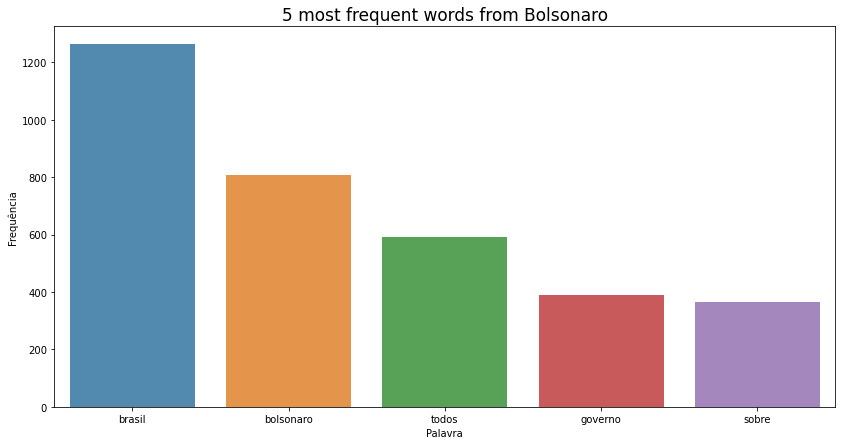

In [30]:
# Plot 5 most frequent words from Bolsonaro

plt.figure(figsize=(14,7))

sns.barplot(x='Palavra', y= 'Frequência', data=counts_df1.head(5), alpha=0.85)

plt.title('5 most frequent words from Bolsonaro', size=17)

plt.show()

### Principais *insights* das palavras com maior frequência do Bolsonaro

- Verifica-se que as palavras com maior frequência nos tweets do Bolsonaro não possuem ideologia política quando analisadas individualmente. Entretanto, considerando o contexto pode-se inferir algum cenário político; <br><br>

- A palavra "Brasil" por si só não há interpretação política, contudo percebe-se que o político a utiliza bastante em jargões políticos; <br><br>

- As palavras "Bolsonaro" e "governo" podem ser associadas também a ideologia política, pois a primeira refere-se ao político analisado e a segunda é intrínseca à política; <br><br>

- Por fim, as palavras "todos" e "sobre" não têm associação com ideologia política.

In [31]:
# Word tokenization

tokens2 = word_tokenize(txt2)

# The most frequent words

counts2 = Counter(tokens2)
counts_df2 = pd.DataFrame.from_dict(counts2, orient='index').reset_index()

# Column names

counts_df2.columns = ['Palavra','Frequência']

# Sort words according to frequency and descending

counts_df2.sort_values(by='Frequência', ascending=False, inplace=True)

In [32]:
# 10 most frequent words from Lula

counts_df2.head(20)

,Palavra,Frequência
0,lula,5351
148,país,1712
34,brasil,1509
50,povo,1330
10107,lulapelobrasil,1169
638,fernando,1023
64,presidente,933
330,gente,925
281,pra,844
202,fazer,719


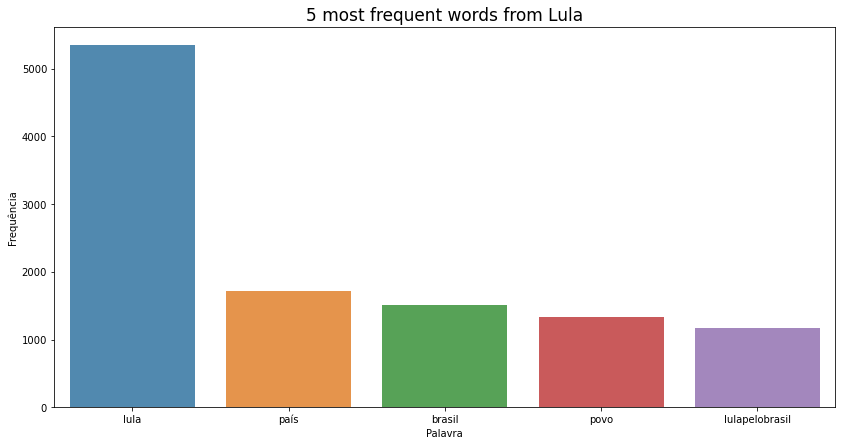

In [33]:
# Plot 5 most frequent words from Lula

plt.figure(figsize=(14,7))

sns.barplot(x='Palavra', y= 'Frequência', data=counts_df2.head(5), alpha=0.85)

plt.title('5 most frequent words from Lula', size=17)

plt.show()

### Principais *insights* das palavras com maior frequência do Lula

- Como citado na análise anterior do Bolsonaro, as palavras com maior frequência nos tweets do Lula também não possuem ideologia política quando analisadas individualmente. Entretanto, considerando o contexto pode-se inferir algum cenário político; <br><br>

- A palavra "Lula" pode ser associada  a ideologia política, pois a refere-se ao político analisado; <br><br>

- As palavras "país", "brasil" e "povo" podem ser associadas a discursos políticos, nos quais são descritos opniões e propostas políticas para o país (ou brasil ou povo);

- Por fim, a palavra "lulapelobrasil" é na verdade uma hashtag, na qual é possível deduzir o ativismo político do Lula.

### 4.3 Bigrams

In [34]:
# Bigrams

buscaBigramas1 = nltk.collocations.BigramCollocationFinder.from_words(tokens1) # Bolsonaro

buscaBigramas2 = nltk.collocations.BigramCollocationFinder.from_words(tokens2) # Lula

In [35]:
# Count the frequency

bigrama_freq1 = buscaBigramas1.ngram_fd.items() # Bolsonaro

bigrama_freq2 = buscaBigramas2.ngram_fd.items() # Lula

In [36]:
# Bigrams dataframe

FreqBigramas1 = pd.DataFrame(list(bigrama_freq1), 
                               columns = ['Bigrama', 'Freq']).sort_values(by = 'Freq', ascending = False) # Bolsonaro

FreqBigramas2 = pd.DataFrame(list(bigrama_freq2), 
                               columns = ['Bigrama', 'Freq']).sort_values(by = 'Freq', ascending = False) # Lula

In [37]:
# Result preview

FreqBigramas1.head(20) # Bolsonaro

,Bigrama,Freq
1165,"(jair, bolsonaro)",256
17017,"(forte, abraço)",143
0,"(boa, noite)",89
13845,"(bom, dia)",74
1160,"(abraço, todos)",67
607,"(direitos, humanos)",65
1,"(noite, todos)",60
519,"(rio, janeiro)",53
7783,"(grande, abraço)",50
2430,"(segurança, pública)",49


### Principais *insights* dos Bigramas do Bolsonaro

- Vários bigramas são palavras de saudação ou de despedida que são utilizadas com frequência pelo Bolsonaro, tais como: "bom dia", "boa noite", "forte abraço", etc. Logo, esses bigramas não contém ideologia política aparente; <br><br>

- Entretanto, é possível inferir temas que possuem discussões políticas em certos bigramas, como: (direitos, humanos), (segurança, pública), (fake, news), (voto, impresso), (governo, bolsonaro); <br><br>

- Por fim, apesar de alguns bigramas não possuirem informações relevantes, é possível identificar em certos bigramas assuntos de discussões políticas.

In [38]:
# Result preview

FreqBigramas2.head(20) # Lula

,Bigrama,Freq
17075,"(ricardo, stuckert)",540
500,"(povo, brasileiro)",304
1874,"(presidente, lula)",297
9109,"(foto, ricardo)",293
64964,"(lulapeloriodejaneiro, lulapelobrasil)",245
57252,"(lulaporminasgerais, lulapelobrasil)",244
13443,"(fernando, haddad)",236
78707,"(lula, livre)",234
16070,"(fotos, ricardo)",179
1412,"(expresidente, lula)",171


### Principais *insights* dos Bigramas do Lula

- Pode-se inferir que os bigramas (lulapeloriodejaneiro, lulapelobrasil) e (lulaporminasgerais, lulapelobrasil) tratam de viajens do Lula nas cidades mencionadas (Rio de Janeiro e Minas Gerais) com interesses políticos; <br><br>

- O bigrama com maior frequência trata-se do fotógrafo oficial do Lula, não tendo ideologia política; <br><br>

- O segundo bigrama com maior frequência, trata-se da "pessoa" que o Lula se dirige em muitos dos seus discursos políticos; <br><br>

- O bigrama (lula, livre) trata-se de um jargão bastante utilizado pelos apoiadores do Lula; <br><br>

- O bigrama (fernando, haddad) trata-se de um aliado político do mesmo partido do Lula, o qual foi candidato em 2018. Nesse bigrama pode-se deduzir apoio político ao candidato, ou seja, ideologia política; <br><br>

- Por fim, nem todos os bigramas trazem informações relevantes, mas em certos bigramas é possível inferir ideologia política.

### Trigrams

In [39]:
# Trigrams

buscaTrigramas1 = nltk.collocations.TrigramCollocationFinder.from_words(tokens1) # Bolsonaro

trigrama_freq1 = buscaTrigramas1.ngram_fd.items() # Bolsonaro

buscaTrigramas2 = nltk.collocations.TrigramCollocationFinder.from_words(tokens2) # Lula
 
trigrama_freq2 = buscaTrigramas2.ngram_fd.items() # Lula


In [40]:
# Trigrams dataframe

FreqTrigramas1 = pd.DataFrame(list(trigrama_freq1), 
                                columns = ['Trigrama','Freq']).sort_values(by = 'Freq', ascending = False) # Bolsonaro

FreqTrigramas2 = pd.DataFrame(list(trigrama_freq2), 
                                columns = ['Trigrama','Freq']).sort_values(by = 'Freq', ascending = False) # Lula

In [41]:
# Result preview

FreqTrigramas1.head(10) # Bolsonaro

,Trigrama,Freq
0,"(boa, noite, todos)",59
2878,"(brasil, acima, tudo)",40
15170,"(bom, dia, todos)",39
26766,"(forte, abraço, todos)",31
6633,"(deus, acima, todos)",29
6631,"(acima, tudo, deus)",28
6632,"(tudo, deus, acima)",28
18685,"(rio, grande, sul)",23
49725,"(presidente, jair, bolsonaro)",18
51148,"(governo, jair, bolsonaro)",15


### Principais *insights* dos Trigramas do Bolsonaro

- Os trigamas do Bolsonaro não apresentaram informações relevantes; <br><br>

- Os trigramas (deus, acima, todos), (acima, tudo, deus) e (tudo, deus, acima) contém palavras utilizadas nos jargões políticos do Bolsonaro.

In [42]:
# Result preview

FreqTrigramas2.head(10) # Lula

,Trigrama,Freq
20380,"(foto, ricardo, stuckert)",288
26617,"(fotos, ricardo, stuckert)",178
102451,"(vigília, lula, livre)",94
117284,"(fernando, haddad, candidato)",78
27396,"(vídeo, ricardo, stuckert)",69
104627,"(após, visita, lula)",64
5197,"(lula, fala, agora)",54
1221,"(inácio, lula, silva)",50
1220,"(luiz, inácio, lula)",50
4166,"(rio, grande, sul)",46


### Principais *insights* dos Trigramas do Lula

- Os trigramas do Lula apresentam informações relevantes sobre ideologia política, por exemplo, os trigramas (vigília, lula, livre) e (após, visita, lula) referem-se ao período em que o Lula esteve preso, alegando ser um preso político; <br><br>

- Por fim, o trigrama (fernando, haddad, candidato) demonstra o apoio político ao candidato do seu partido na eleição de 2018.

## Conclusion

A primeira abordagem realizada no item 4.1 demonstrou que a utilização do *Twitter* pelos políticos analisados é relativamente recente, tendo se intesificado durante os últimos 5 anos. Além disso, verificou-se que os períodos eleitorais influenciam na quantidade de *tweets* postados. Dessa forma, pode-se inferir que essa ferramenta é utilizada para a discussão política e para apoio de candidatos políticos. <br>

Já na segunda abordagem realizada no item 4.2 constata-se que as palavras por si só não indicam contexto político, porém, quando colocadas em contexto é possível identificar assuntos de discussão política, eleitorado para qual o político se dirige e palavras comumente utilizadas em discursos ou jargões políticos. <br>

Por fim, a última abordagem realizada no item 4.3 trata-se da análise dos bigramas e dos trigramas, na qual foi possível identificar temas de discussão política, contextos políticos, apoio a candidato aliado, palavras que são utilizadas para representar o eleitorado dos políticos e palavras que são frequentemente utilizadas em jargões ou discursos políticos. Entrentato, há vários brigramas e trigramas que contém informações irrelevantes, tais como: palavras de saudação ou de despedida e palavras que não contém contexto político.

## References

#### https://github.com/gurezende/Studying/tree/master/Python/SentimentAnalysis